<a href="https://colab.research.google.com/github/andizhagyta/Tugas-Besar-SLO-Support-Vector-Machine-SVM-/blob/main/TUGAS_BESAR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import os
from scipy.signal import detrend
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, classification_report

# Fungsi untuk memuat data dari direktori
def load_data(directory):
    all_data = []
    for file in os.listdir(directory):
        if file.endswith(".txt"):
            file_path = os.path.join(directory, file)
            data = np.loadtxt(file_path)
            all_data.append(data)
    return all_data

# Direktori tempat data disimpan
directory_paths = {
    'A': '/content/drive/MyDrive/DATASET TUBES/A',
    'B': '/content/drive/MyDrive/DATASET TUBES/B',
    'C': '/content/drive/MyDrive/DATASET TUBES/C',
    'D': '/content/drive/MyDrive/DATASET TUBES/D',
    'E': '/content/drive/MyDrive/DATASET TUBES/E'
}

# Memuat data
data = {}
for key, path in directory_paths.items():
    data[key] = load_data(path)
    print(f"Loaded {key}: {len(data[key])} files")

# Konversi list data menjadi array numpy dan pastikan semua data memiliki dimensi yang sama
data_arrays = {}
min_lengths = []

for key in data.keys():
    if len(data[key]) > 0:
        lengths = [len(sample) for sample in data[key]]
        min_lengths.append(min(lengths))
        min_length = min(lengths)
        data_arrays[key] = np.array([sample[:min_length] for sample in data[key]])
        print(f"Shape of {key}: {data_arrays[key].shape}")
    else:
        print(f"Set {key} is empty")

if len(min_lengths) > 0:
    min_length = min(min_lengths)
else:
    raise ValueError("No valid data files found in the datasets.")

# Skenario 1: ABCD vs E
data_abd = np.concatenate([data_arrays['A'], data_arrays['B'], data_arrays['D']], axis=0)
labels_abd = np.zeros(data_abd.shape[0])  # Label 0 untuk gabungan data non-seizure

data_e = data_arrays['E']
labels_e = np.ones(data_e.shape[0])  # Label 1 untuk data seizure

# Menggabungkan data A, B, D dan E untuk klasifikasi
X_abd_e = np.concatenate([data_abd, data_e], axis=0)
y_abd_e = np.concatenate([labels_abd, labels_e], axis=0)

# Preprocessing data
X_abd_e_detrended = detrend(X_abd_e, axis=1)  # Detrending
scaler = StandardScaler()
X_abd_e_normalized = scaler.fit_transform(X_abd_e_detrended)

# Split data menjadi training dan testing set
X_train_abd_e, X_test_abd_e, y_train_abd_e, y_test_abd_e = train_test_split(X_abd_e_normalized, y_abd_e, test_size=0.2, random_state=42)

# Dictionary untuk menyimpan model SVM dengan berbagai kernel
svm_models = {}

# Membangun model SVM dengan berbagai kernel
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, gamma='scale')

    if kernel == 'poly':
        svm_model.degree = 3  # Degree 3 untuk kernel polinomial

    svm_model.fit(X_train_abd_e, y_train_abd_e)
    svm_models[kernel] = svm_model

    # Melakukan prediksi
    y_pred_abd_e = svm_model.predict(X_test_abd_e)

    # Evaluasi model
    accuracy_abd_e = accuracy_score(y_test_abd_e, y_pred_abd_e)
    print(f"Akurasi Model SVM dengan kernel {kernel} untuk SET ABCD vs E: {accuracy_abd_e * 100:.2f}%")
    print(classification_report(y_test_abd_e, y_pred_abd_e))

# Skenario 2: AB vs E
data_ab = np.concatenate([data_arrays['A'], data_arrays['B']], axis=0)
labels_ab = np.zeros(data_ab.shape[0])  # Label 0 untuk gabungan data non-seizure

# Menggabungkan data A, B dan E untuk klasifikasi
X_ab_e = np.concatenate([data_ab, data_e], axis=0)
y_ab_e = np.concatenate([labels_ab, labels_e], axis=0)

# Preprocessing data
X_ab_e_detrended = detrend(X_ab_e, axis=1)  # Detrending
X_ab_e_normalized = scaler.fit_transform(X_ab_e_detrended)

# Split data menjadi training dan testing set
X_train_ab_e, X_test_ab_e, y_train_ab_e, y_test_ab_e = train_test_split(X_ab_e_normalized, y_ab_e, test_size=0.2, random_state=42)

# Membangun model SVM dengan berbagai kernel untuk Skenario 2
for kernel in kernels:
    svm_model = SVC(kernel=kernel, gamma='scale')

    if kernel == 'poly':
        svm_model.degree = 3  # Degree 3 untuk kernel polinomial

    svm_model.fit(X_train_ab_e, y_train_ab_e)

    # Melakukan prediksi
    y_pred_ab_e = svm_model.predict(X_test_ab_e)

    # Evaluasi model
    accuracy_ab_e = accuracy_score(y_test_ab_e, y_pred_ab_e)
    print(f"Akurasi Model SVM dengan kernel {kernel} untuk SET AB vs E: {accuracy_ab_e * 100:.2f}%")
    print(classification_report(y_test_ab_e, y_pred_ab_e))

# Skenario 3: A vs E
labels_a = np.zeros(data_arrays['A'].shape[0])  # Label 0 untuk data non-seizure

# Menggabungkan data A dan E untuk klasifikasi
X_a_e = np.concatenate([data_arrays['A'], data_e], axis=0)
y_a_e = np.concatenate([labels_a, labels_e], axis=0)

# Preprocessing data
X_a_e_detrended = detrend(X_a_e, axis=1)  # Detrending
X_a_e_normalized = scaler.fit_transform(X_a_e_detrended)

# Split data menjadi training dan testing set
X_train_a_e, X_test_a_e, y_train_a_e, y_test_a_e = train_test_split(X_a_e_normalized, y_a_e, test_size=0.2, random_state=42)

# Membangun model SVM dengan berbagai kernel untuk Skenario 3
for kernel in kernels:
    svm_model = SVC(kernel=kernel, gamma='scale')

    if kernel == 'poly':
        svm_model.degree = 3  # Degree 3 untuk kernel polinomial

    svm_model.fit(X_train_a_e, y_train_a_e)

    # Melakukan prediksi
    y_pred_a_e = svm_model.predict(X_test_a_e)

    # Evaluasi model
    accuracy_a_e = accuracy_score(y_test_a_e, y_pred_a_e)
    print(f"Akurasi Model SVM dengan kernel {kernel} untuk SET A vs E: {accuracy_a_e * 100:.2f}%")
    print(classification_report(y_test_a_e, y_pred_a_e))


Loaded A: 100 files
Loaded B: 100 files
Loaded C: 0 files
Loaded D: 100 files
Loaded E: 100 files
Shape of A: (100, 4097)
Shape of B: (100, 4097)
Set C is empty
Shape of D: (100, 4097)
Shape of E: (100, 4097)
Akurasi Model SVM dengan kernel linear untuk SET ABCD vs E: 87.50%
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        62
         1.0       1.00      0.44      0.62        18

    accuracy                           0.88        80
   macro avg       0.93      0.72      0.77        80
weighted avg       0.89      0.88      0.86        80

Akurasi Model SVM dengan kernel poly untuk SET ABCD vs E: 80.00%
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.89        62
         1.0       1.00      0.11      0.20        18

    accuracy                           0.80        80
   macro avg       0.90      0.56      0.54        80
weighted avg       0.84      0.80      0.73        80

Akura

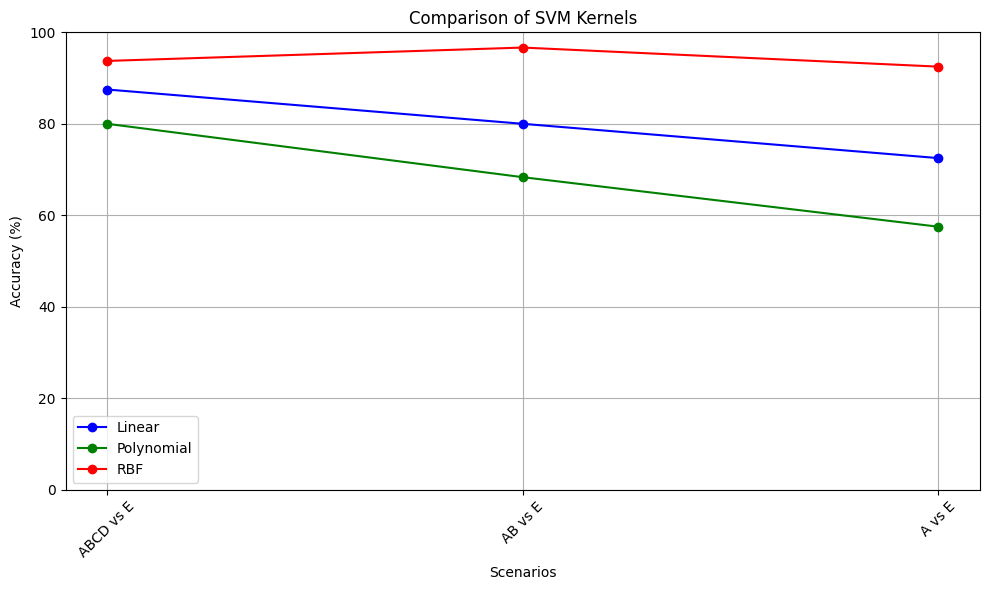

In [17]:
import matplotlib.pyplot as plt

# Data hasil akurasi untuk setiap skenario dan kernel
accuracies_linear = [87.50, 80.00, 72.50]  # Accuracy for linear kernel: ABCD vs E, AB vs E, A vs E
accuracies_poly = [80.00, 68.33, 57.50]   # Accuracy for polynomial kernel: ABCD vs E, AB vs E, A vs E
accuracies_rbf = [93.75, 96.67, 92.50]    # Accuracy for RBF kernel: ABCD vs E, AB vs E, A vs E

# Labels untuk setiap skenario
scenarios = ['ABCD vs E', 'AB vs E', 'A vs E']

# Plotting grafik
plt.figure(figsize=(10, 6))

plt.plot(scenarios, accuracies_linear, marker='o', linestyle='-', color='b', label='Linear')
plt.plot(scenarios, accuracies_poly, marker='o', linestyle='-', color='g', label='Polynomial')
plt.plot(scenarios, accuracies_rbf, marker='o', linestyle='-', color='r', label='RBF')

plt.title('Comparison of SVM Kernels')
plt.xlabel('Scenarios')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
